### Problem Statement :- Spam Message Classification :

### 1) Data *Preprocessing* :

#### Import Libraries :

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import Dataset :

In [56]:
df = pd.read_csv(r'C:\Users\PALLAVI\Downloads\spam.tsv', sep='\t')

#### View Top 5 Rows :

In [57]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


#### View Bottom 5 Rows :

In [58]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


#### Check Null values :

In [59]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

#### View Data Description :

In [60]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


#### Count of "label" Column :

In [61]:
df['label'].value_counts()/ (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [62]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [63]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [64]:
ham.shape, spam.shape

((4825, 4), (747, 4))

#### Balance Data Count :

In [65]:
ham = ham.sample(spam.shape[0])

In [66]:
ham.shape, spam.shape

((747, 4), (747, 4))

#### Append Dataset :

In [67]:
data = ham.append(spam, ignore_index=True)

In [68]:
data.shape

(1494, 4)

In [69]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [70]:
data.head()

,label,message,length,punct
0,ham,Hey i've booked the 2 lessons on sun liao...,44,4
1,ham,Great! I hope you like your man well endowed. ...,72,10
2,ham,Ü takin linear algebra today?,29,1
3,ham,Good. No swimsuit allowed :),28,3
4,ham,Don‘t give a flying monkeys wot they think and...,103,2


#### Visuaisation :

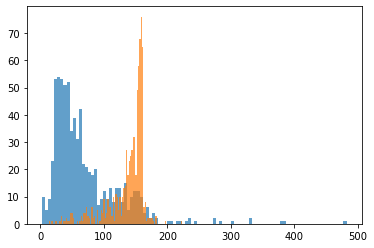

In [71]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

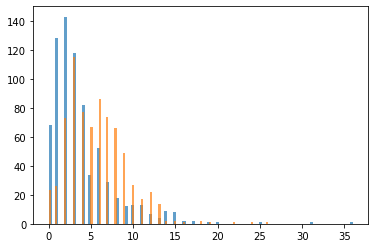

In [72]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [73]:
data

,label,message,length,punct
0,ham,Hey i've booked the 2 lessons on sun liao...,44,4
1,ham,Great! I hope you like your man well endowed. ...,72,10
2,ham,Ü takin linear algebra today?,29,1
3,ham,Good. No swimsuit allowed :),28,3
4,ham,Don‘t give a flying monkeys wot they think and...,103,2
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


#### Split Dataset Into Train & Test set :

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

In [76]:
X_train.shape

(1045,)

In [77]:
X_test.shape

(449,)

### 2) Building the Model (Random Forest) :

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [79]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [80]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

### 3) Predicting the results (Random Forest) :

In [81]:
y_pred = classifier.predict(X_test)

In [82]:
 y_pred

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', 'h

In [83]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### Accuracy :

In [84]:
accuracy_score(y_test, y_pred)

0.9354120267260579

#### Confusion Matrix :

In [85]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 27, 195]], dtype=int64)

#### Classification Report :

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       227
        spam       0.99      0.88      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.93      0.94       449
weighted avg       0.94      0.94      0.94       449



### .......................................................................................................................................................

### 4) Building the Model (SVM) :

In [87]:
from sklearn.svm import SVC

In [88]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [89]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

### 5) Predicting the results (SVM) :

In [90]:
y_pred = svm.predict(X_test)

In [91]:
y_pred

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham

#### Accuracy :

In [92]:
accuracy_score(y_test, y_pred)

0.9532293986636972

#### Confusion Matrix :

In [93]:
confusion_matrix(y_test, y_pred)

array([[223,   4],
       [ 17, 205]], dtype=int64)

#### Classification Report :

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.96       227
        spam       0.98      0.92      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



#### Now, Test our model with "New Data" :

In [95]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

#### Prediction with Random Forest :

In [96]:
y_pred = classifier.predict(test1)
y_pred

array(['ham'], dtype=object)

In [97]:
y_pred = classifier.predict(test2)
y_pred

array(['ham'], dtype=object)

In [98]:
y_pred = classifier.predict(test3)
y_pred

array(['spam'], dtype=object)

#### Prediction with SVM :

In [99]:
y_pred = svm.predict(test1)
y_pred

array(['ham'], dtype=object)

In [100]:
y_pred = svm.predict(test2)
y_pred

array(['ham'], dtype=object)

In [101]:
y_pred = svm.predict(test3)
y_pred

array(['spam'], dtype=object)

### ................ Thank You................................